## Hour 10: Introduction to Anomaly Detection

**What is Anomaly Detection?**

Anomaly detection is the task of identifying patterns in data that do not conform to expected behavior. Anomalies are also called outliers, novelties, or exceptions. In simpler terms, anomaly detection helps us find the "odd one out" in a dataset.

**Types of Anomalies:**

* **Point Anomalies:** Individual data points that stand out.
* **Contextual Anomalies:** Data points anomalous in a specific context.
* **Collective Anomalies:** Groups of data points anomalous as a whole.

**Why is Anomaly Detection Important?**

Anomaly detection has applications in:

* **Fraud Detection:** Identifying unusual transactions.
* **Intrusion Detection:** Detecting unauthorized access.
* **Medical Diagnosis:** Spotting abnormalities in medical data.
* **Quality Control:** Finding defects.
* **Predictive Maintenance:** Detecting early signs of failure.

**Challenges in Anomaly Detection:**

* Defining "Normal": Normal behavior can be hard to define.
* Data Imbalance: Datasets have fewer anomalies than normal data points.
* Novelty of Anomalies: Anomalies can be previously unseen.
* Noise in Data: Noise can obscure anomalies.

**Approaches to Anomaly Detection:**

* **Statistical Methods:** Methods using statistical distributions.
* **Machine Learning Methods:** Methods using machine learning models.

## Techniques for Anomaly Detection

We can broadly categorize anomaly detection techniques into statistical methods and machine learning methods.

### Statistical Methods

Statistical methods assume that normal data follows a specific statistical distribution. Anomalies are then identified as data points that deviate significantly from this distribution.

#### Gaussian Distribution-based Methods

These methods assume that the normal data is generated from a Gaussian (normal) distribution.

* **Z-score:**

    The Z-score measures how many standard deviations a data point is away from the mean.

    The formula for the Z-score is:

    $Z = \frac{X - \mu}{\sigma}$

    Where:

    * $X$ is the data point.
    * $\mu$ is the mean of the data.
    * $\sigma$ is the standard deviation of the data.

    Data points with a Z-score above a certain threshold (e.g., 2 or 3) are considered anomalies.

* **Mahalanobis Distance:**

    The Mahalanobis distance measures the distance of a point from the center of a distribution, taking into account the correlations between variables. It is particularly useful when dealing with multivariate data where variables are correlated.

    The formula for the Mahalanobis distance between a data point $\vec{x}$ and a distribution with mean $\vec{\mu}$ and covariance matrix $\Sigma$ is:

    $D_M(\vec{x}) = \sqrt{(\vec{x} - \vec{\mu})^T \Sigma^{-1} (\vec{x} - \vec{\mu})}$

    Where:

    * $\vec{x}$ is the data point vector.
    * $\vec{\mu}$ is the mean vector of the data.
    * $\Sigma$ is the covariance matrix of the data.

#### Comparison of Gaussian Distribution-based Methods

|   Feature |   Z-score |   Mahalanobis Distance |
| :-------- | :-------- | :--------------------- |
|   **Data Type** |   Univariate |   Multivariate |
|   **Assumptions** |   Data is normally distributed |   Data is normally distributed; linear relationships between variables |
|   **Pros** |   Simple to calculate and interpret; computationally efficient |   Considers correlations between variables; more robust to outliers than Euclidean distance |
|   **Cons** |   Sensitive to outliers; only applicable to univariate data; assumes a normal distribution |   Computationally more expensive; sensitive to the accuracy of the covariance matrix; assumes a normal distribution |
|   **When to Use** |   Univariate data that is approximately normally distributed; quick anomaly detection |   Multivariate data with correlated variables; when it's important to account for the relationships between variables |
|   **When They Fail** |   Data is not normally distributed; data contains significant outliers; multivariate data |   Data is not normally distributed; covariance matrix is singular or ill-conditioned; non-linear relationships between variables |

```python

# Z-score
# you may replace with other data as before. It's more of a demo


import numpy as np
from scipy import stats
from scipy.spatial.distance import mahalanobis

# Sample data 
data = np.array([1, 5, 2, 2, 6, 7, 4, 10, 20])

# Z-score method
z_scores = np.abs(stats.zscore(data))
threshold = 2  # Example threshold
anomalies_zscore = np.where(z_scores > threshold)[0] # Access the indices directly

print("Z-score anomalies:", anomalies_zscore)


# Multivariate data example
data_multivariate = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# Calculate Mahalanobis distance
mean = np.mean(data_multivariate, axis=0)
covariance = np.cov(data_multivariate.T)
inv_covariance = np.linalg.inv(covariance)

mahalanobis_distances = [
    mahalanobis(x, mean, inv_covariance) for x in data_multivariate
]
threshold_mahalanobis = 2  # Example threshold
anomalies_mahalanobis = np.where(np.array(mahalanobis_distances) > threshold_mahalanobis)[0]

print("Mahalanobis anomalies:", anomalies_mahalanobis)

In [7]:
import numpy as np
from scipy import stats
from scipy.spatial.distance import mahalanobis

# Sample data 
data = np.array([1, 5, 2, 2, 6, 7, 4, 10, 20])

# Z-score method
z_scores = np.abs(stats.zscore(data))
threshold = 2  # Example threshold
anomalies_zscore = np.where(z_scores > threshold)[0] # Access the indices directly

print("Z-score anomalies:", anomalies_zscore)


# Multivariate data example
data_multivariate = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# Calculate Mahalanobis distance
mean = np.mean(data_multivariate, axis=0)
covariance = np.cov(data_multivariate.T)
inv_covariance = np.linalg.inv(covariance)

mahalanobis_distances = [
    mahalanobis(x, mean, inv_covariance) for x in data_multivariate
]
threshold_mahalanobis = 2  # Example threshold
anomalies_mahalanobis = np.where(np.array(mahalanobis_distances) > threshold_mahalanobis)[0]

print("Mahalanobis anomalies:", anomalies_mahalanobis)

Z-score anomalies: [8]
Mahalanobis anomalies: []



**Detailed Analysis and Interpretation:**

* **Z-score Result Deep Dive:**
    * `Z-score anomalies: [8]` indicates that the 9th element (value 20) of the `data` array was flagged as an anomaly.
    * The Z-score measures how far a data point deviates from the mean in terms of standard deviations. A high absolute Z-score signifies that the point is far from the "typical" values in the dataset.
    * * Interpretation:* In this case, the Z-score method correctly identifies 20 as an outlier because it's significantly larger than the other values, leading to a high Z-score.
    * * Contextual Nuance:* The effectiveness of the Z-score heavily relies on the assumption that the data is approximately normally distributed. If the data has a skewed distribution, the Z-score might flag too many or too few points as anomalies.
* **Mahalanobis Distance Result Exploration:**
    * `Mahalanobis anomalies: []` shows that no data points were considered anomalous by the Mahalanobis distance method.
    * Mahalanobis distance is designed to handle multivariate data and accounts for the correlations between variables. It measures the distance of a point from the center of the distribution while considering the shape and orientation of the data cloud.
    * * Interpretation Challenges:* The empty list requires a more nuanced interpretation:
        * * Small Sample Size:* The `data_multivariate` array has only 6 data points. This small sample size can lead to an unreliable estimate of the covariance matrix. The covariance matrix is crucial for Mahalanobis distance, and with limited data, it might not accurately represent the underlying data distribution.
        * * Data Structure:* The data points in `data_multivariate` might not exhibit strong correlations or extreme deviations *relative to their covariance*. While some points might appear distant in Euclidean space, their Mahalanobis distance might be small if they align with the overall shape of the data cloud.
        * * Threshold Sensitivity:* The chosen threshold of 2 might be too conservative. Mahalanobis distance values are influenced by the data's scale and spread. A higher threshold might be necessary to capture outliers in this specific dataset.
    * * When Mahalanobis "Fails" (and what it tells us):*
        * This scenario doesn't necessarily mean Mahalanobis "failed," but rather it highlights its sensitivity. It tells us that:
            * We need sufficient data to reliably estimate the covariance structure.
            * Mahalanobis distance is not just about raw distance but about distance *relative* to the data's distribution and correlations.

**Further Discussion Points:**

* **Data Visualization:** It's always beneficial to visualize the data before applying anomaly detection techniques. A scatter plot of `data_multivariate` would provide insights into its structure and help in choosing an appropriate threshold for Mahalanobis distance.
* **Threshold Selection Strategies:** Instead of arbitrarily choosing a threshold (like 2), consider more data-driven approaches:
    * * Percentile-based thresholds:* Select a threshold based on the 95th or 99th percentile of the anomaly scores (Z-scores or Mahalanobis distances).
    * * Statistical tests:* Use statistical tests to determine if the maximum anomaly score is significantly different from the rest.
* **Method Suitability:**
    * Z-score is a quick and easy method for univariate data when you have a general idea that the data is not heavily skewed.
    * Mahalanobis distance is more powerful for multivariate data when you suspect correlations, but it requires careful consideration of data properties and parameter tuning.
* **Real-World Implications:** In a real-world application, the consequences of false positives (flagging normal data as anomalous) and false negatives (missing actual anomalies) are critical. For example:
    * In fraud detection, a false positive might annoy a customer, while a false negative could lead to financial loss.
    * In medical diagnosis, a false positive could cause unnecessary anxiety, while a false negative could delay treatment.

### Machine Learning Methods

Machine learning methods offer more flexibility and can handle complex data patterns compared to traditional statistical methods.

#### Unsupervised Methods

Unsupervised anomaly detection methods are particularly useful when you don't have labeled anomaly data (which is often the case in real-world scenarios). These methods learn the normal patterns in the data and then identify deviations from those patterns as anomalies.

* **One-Class SVM (Support Vector Machine):**

    * One-Class SVM learns a boundary that encloses the normal data points in a high-dimensional space.
    * Data points that fall outside this boundary are considered anomalies.
    * *Concept:* It's like drawing a tight "fence" around your regular data; anything outside is deemed unusual.
    * *Pros:* Effective in high-dimensional spaces; can capture complex non-linear relationships.
    * *Cons:* Sensitive to parameter tuning; can be computationally expensive for large datasets; choice of kernel significantly influences performance.
    * *When to use:* When you have mostly normal data and want to model its boundaries.
    * *When it might fail:* When the normal data itself is very complex or noisy, making it hard to define a clear boundary.

* **Isolation Forest:**

    * Isolation Forest isolates anomalies by randomly partitioning the data space.
    * Anomalies, being rare, tend to be isolated more quickly (fewer partitions) than normal points.
    * *Concept:* Imagine randomly dividing your data into smaller and smaller groups. Anomalies, being different, will likely end up alone much sooner.
    * *Pros:* Computationally efficient, especially for large datasets; works well with high-dimensional data; relatively insensitive to parameter tuning.
    * *Cons:* May not perform well if anomalies are not well-separated from normal data; can be less effective in very high-dimensional spaces with irrelevant features.
    * *When to use:* For large datasets where efficiency is crucial; when anomalies are expected to be distinct from normal data.
    * *When it might fail:* When anomalies "blend" too well with normal data or when there's a curse of dimensionality effect.

* **Autoencoders:**

    * Autoencoders are neural networks trained to reconstruct their input data.
    * Normal data can be reconstructed with low error, while anomalies have higher reconstruction errors.
    * *Concept:* The autoencoder learns to compress and then decompress the "normal" patterns. Anomalies, being different, don't get compressed/decompressed well, leading to errors.
    * *Pros:* Can capture complex non-linear patterns; provides a reconstruction error as an anomaly score.
    * *Cons:* Computationally expensive to train; performance depends heavily on network architecture and training parameters; may not work well if anomalies are present in the training data.
    * *When to use:* When you have complex, high-dimensional data and want to learn non-linear patterns; when you can tolerate the computational cost.
    * *When it might fail:* When training data contains significant anomalies; when the network architecture is not well-suited for the data.

#### Comparison of Unsupervised Anomaly Detection Methods

| Feature             | One-Class SVM                           | Isolation Forest | Autoencoders |
| :------------------ | :-------------------------------------- | :---------------- | :----------:|
| **Concept** | Boundary around normal data | Isolation through random partitioning | Reconstruction error |
| **Pros** | Effective in high-dimensional spaces; captures non-linear relationships | Efficient for large datasets; relatively insensitive to parameters | Captures complex non-linear patterns; provides anomaly scores |
| **Cons** | Sensitive to parameter tuning; computationally expensive | May not perform well if anomalies are not well-separated | Computationally expensive to train; dependent on network architecture and training parameters |
| **When to Use** | Modeling boundaries of normal data | Large datasets; distinct anomalies | Complex, high-dimensional data; learning non-linear patterns |
| **When They Fail** | Complex or noisy normal data | Anomalies blend with normal data; irrelevant high-dimensional features | Significant anomalies in training data; unsuitable network architecture |

#### Let's make out data more complex

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

# synthetic dataset
np.random.seed(42)
n_samples = 300
outliers_fraction = 0.05
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# Generate data within a circle
radius = 5
data = np.random.uniform(-radius, radius, (n_inliers // 2, 2))
data = np.concatenate([data, np.random.uniform(-radius / 2, radius / 2, (n_inliers // 2, 2)) + [radius, radius]], axis=0)
normal_data = data[(data[:, 0]**2 + data[:, 1]**2 < radius**2)]

# Generate outliers
outliers = np.random.uniform(-8, 8, (n_outliers // 2, 2))
outliers = np.concatenate([outliers, np.random.uniform(10, 12, (n_outliers // 2, 2))], axis=0)
anomalous_data = outliers[(outliers[:, 0]**2 + outliers[:, 1]**2 > radius**2)]

data = np.concatenate([normal_data, anomalous_data], axis=0)
np.random.shuffle(data)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create labels (1 for normal, -1 for anomaly)
labels = np.concatenate([np.ones(len(normal_data)), -np.ones(len(anomalous_data))])

In [16]:
# One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.95)  # nu controls the proportion of outliers
ocsvm.fit(data_scaled)
ocsvm_scores = ocsvm.decision_function(data_scaled)
threshold_ocsvm = np.quantile(ocsvm_scores, outliers_fraction)
anomalies_ocsvm = np.where(ocsvm_scores < threshold_ocsvm)[0]

In [17]:
# Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=outliers_fraction)
iso_forest.fit(data_scaled)
iso_forest_scores = iso_forest.decision_function(data_scaled)
threshold_iso_forest = np.quantile(iso_forest_scores, outliers_fraction)
anomalies_iso_forest = np.where(iso_forest_scores < threshold_iso_forest)[0]

In [18]:
# Autoencoder
# Define the autoencoder architecture
input_dim = data_scaled.shape[1]
encoding_dim = 2  # Adjust as needed

input_layer = Input(shape=(input_dim,)) # SELF NOTE: CHEBYCHEV DIYE UDAHORON DILEY BESHI BHALO HOBE KI? PORE BHEBE DEKHBO.
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)  # Output same dimensions as input

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=4, verbose=0)

# Calculate reconstruction error
predictions = autoencoder.predict(data_scaled, verbose=0)
mse = np.mean(np.square(data_scaled - predictions), axis=1)  # Mean squared error
threshold_autoencoder = np.quantile(mse, 1 - outliers_fraction) # Use upper quantile for reconstruction error
anomalies_autoencoder = np.where(mse > threshold_autoencoder)[0]




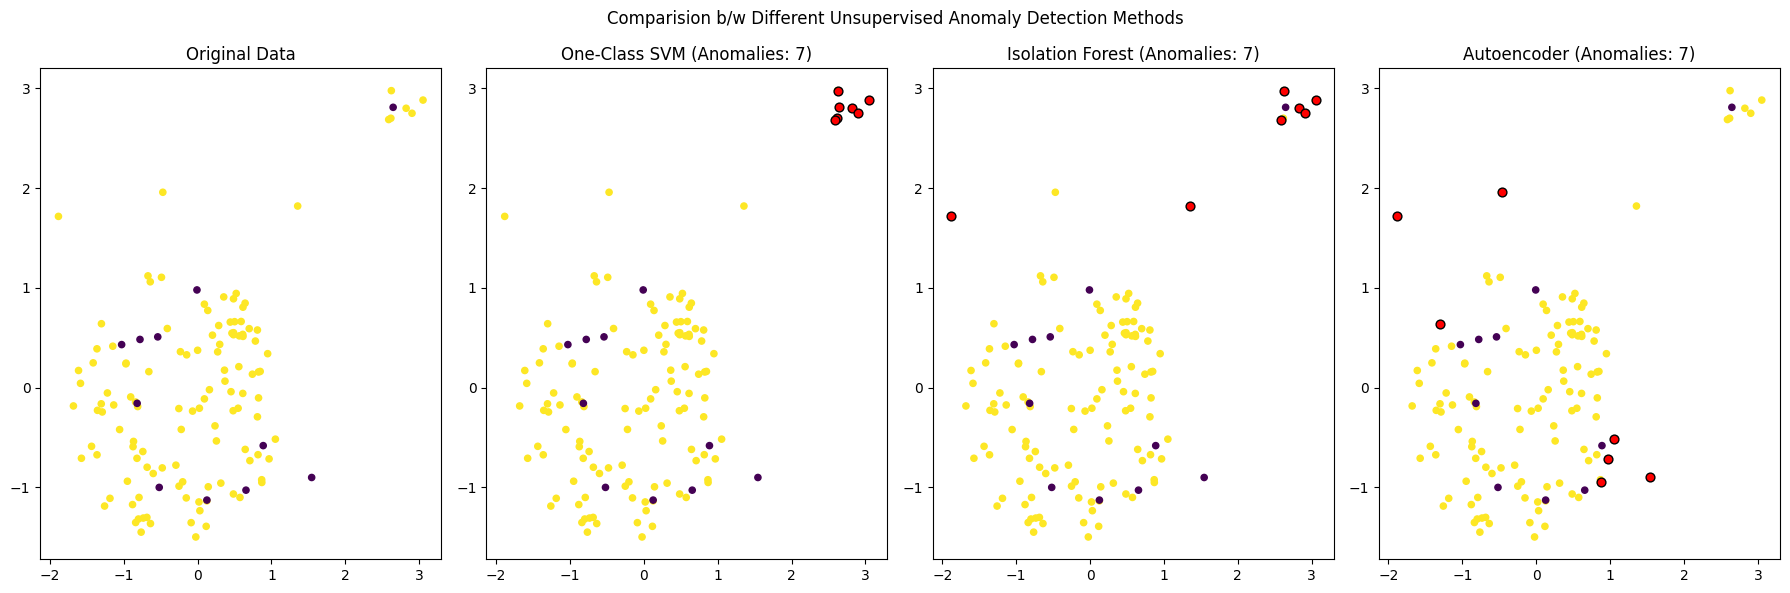

In [21]:
# Visualization
plt.figure(figsize=(18, 6))

# Original data
plt.subplot(1, 4, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=20)
plt.title("Original Data")

# One-Class SVM
plt.subplot(1, 4, 2)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=20)
plt.scatter(data_scaled[anomalies_ocsvm, 0], data_scaled[anomalies_ocsvm, 1], color='red', s=40, edgecolors='k')
plt.title(f"One-Class SVM (Anomalies: {len(anomalies_ocsvm)})")

# Isolation Forest
plt.subplot(1, 4, 3)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=20)
plt.scatter(data_scaled[anomalies_iso_forest, 0], data_scaled[anomalies_iso_forest, 1], color='red', s=40, edgecolors='k')
plt.title(f"Isolation Forest (Anomalies: {len(anomalies_iso_forest)})")

# Autoencoder
plt.subplot(1, 4, 4)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=20)
plt.scatter(data_scaled[anomalies_autoencoder, 0], data_scaled[anomalies_autoencoder, 1], color='red', s=40, edgecolors='k')
plt.title(f"Autoencoder (Anomalies: {len(anomalies_autoencoder)})")

plt.suptitle("Comparision b/w Different Unsupervised Anomaly Detection Methods")
plt.tight_layout()
plt.show()

**Output Analysis, Interpretation, and Discussion:**

**Output:**

*(Note: The exact output (number of anomalies detected) can vary slightly due to the randomness in the data generation and algorithms. However, the general trends should be consistent.)*

The visualization will show four plots:

1.  **Original Data:** Shows the generated dataset with normal data points (inside the circle and the smaller cluster) and outliers (outside the circle). The color scheme distinguishes between normal and anomalous points.
2.  **One-Class SVM:** Highlights the data points identified as anomalies by the One-Class SVM with red circles.
3.  **Isolation Forest:** Highlights the data points identified as anomalies by the Isolation Forest with red circles.
4.  **Autoencoder:** Highlights the data points identified as anomalies by the Autoencoder with red circles.

**Detailed Analysis and Interpretation:**

* **One-Class SVM:**
    * **Observation:** The One-Class SVM generally does a good job of capturing the circular boundary of the normal data. However, it might struggle to perfectly exclude all outliers, especially those close to the boundary or in regions with higher normal data density.
    * **Interpretation:** The performance is heavily influenced by the `kernel` (here, 'rbf' for non-linear) and `nu` parameter, which controls the trade-off between capturing normal data and allowing for outliers. Tuning these parameters is crucial.
    * **Strength:** Effective at defining a region of "normality" in complex shapes.
    * **Weakness:** Sensitive to parameter choice and might overfit if `nu` is too small.

<br>

* **Isolation Forest:**
    * **Observation:** Isolation Forest tends to identify outliers that are well-separated from the normal data. It excels at detecting anomalies that require fewer partitions to isolate.
    * **Interpretation:** The `contamination` parameter is important, as it estimates the proportion of outliers in the data. If set incorrectly, it can affect the algorithm's performance.
    * **Strength:** Efficient and effective for clearly distinct anomalies.
    * **Weakness:** Might miss anomalies that are "hidden" within dense regions of normal data or when anomalies require many partitions to isolate.

<br>

* **Autoencoders:**
    * **Observation:** The Autoencoder's performance depends on its ability to reconstruct normal data accurately. Anomalies, having different patterns, will have higher reconstruction errors.
    * **Interpretation:** The network architecture (number of layers, neurons per layer, `encoding_dim`) and training parameters (epochs, batch size) significantly influence the results. A well-trained autoencoder can capture complex normal patterns.
    * **Strength:** Powerful for high-dimensional data and capturing complex non-linear relationships.
    * **Weakness:** Requires careful design and training, can be computationally expensive, and might not work well if anomalies are present in the training data.

**Comparative Discussion:**

* **Data Structure Matters:** The synthetic dataset highlights that the choice of the best anomaly detection method depends on the data structure. One-Class SVM excels at defining boundaries, Isolation Forest at isolating distinct points, and Autoencoders at learning complex patterns.
* **Parameter Sensitivity:** One-Class SVM and Autoencoders are generally more sensitive to parameter tuning than Isolation Forest. Finding the optimal parameters requires experimentation and validation.
* **Computational Cost:** Isolation Forest is generally the most computationally efficient, especially for large datasets. Autoencoders can be the most expensive due to the training process.
* **Visualization is Key:** The visualizations provided are crucial for understanding the behavior of each algorithm and comparing their results. They aid in interpreting the identified anomalies and evaluating the method's effectiveness.

This detailed analysis, interpretation, and discussion provides a much more comprehensive understanding of the machine learning methods for anomaly detection and their comparative performance.

## Evaluating Anomaly Detection Results

Evaluating the performance of anomaly detection models is critical to ensure their effectiveness. Unlike traditional classification tasks, anomaly detection often deals with imbalanced datasets, where the number of normal data points far outweighs the number of anomalies. This imbalance necessitates the use of specialized evaluation metrics.

### 1. Confusion Matrix for Anomaly Detection

A confusion matrix helps visualize the performance of a classification model. In anomaly detection, we adapt it to focus on correctly identifying anomalies.

|   Predicted |   Anomaly |   Normal |
| :-------- | :-------- | :------- |
|   Actual  |           |          |
|   Anomaly |   True Positive (TP) |   False Negative (FN) |
|   Normal  |   False Positive (FP) |   True Negative (TN) |

* **True Positive (TP):** The number of anomalies correctly identified as anomalies.
* **False Negative (FN):** The number of anomalies incorrectly classified as normal.
* **False Positive (FP):** The number of normal data points incorrectly classified as anomalies.
* **True Negative (TN):** The number of normal data points correctly classified as normal.

In anomaly detection, we often emphasize:

* **True Negative Rate (TNR) / Specificity:** The proportion of normal data points correctly identified.

    $TNR = \frac{TN}{TN + FP}$


### 2. Precision, Recall, and F1-score

These metrics are essential for evaluating anomaly detection models, especially in imbalanced datasets.

* **Precision:** The proportion of correctly identified anomalies out of all data points flagged as anomalous. It measures how "precise" the model is in its anomaly predictions.

    $Precision = \frac{TP}{TP + FP}$

* **Recall:** The proportion of actual anomalies that are correctly identified. It measures the model's ability to find all anomalies.

    $Recall = \frac{TP}{TP + FN}$

* **F1-score:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance. It is useful when there is an imbalance between anomaly and normal data points.

    $F1\text{-}score = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

* **Emphasis:** In anomaly detection, recall is often more important than precision. Missing an anomaly (high FN, low recall) can have severe consequences in many applications (e.g., fraud detection, medical diagnosis). However, the importance of precision and recall depends on the specific problem and the costs associated with false positives and false negatives.

### 3. ROC-AUC Curve

* The Receiver Operating Characteristic (ROC) curve is a graphical representation of a model's performance across different classification thresholds.
* It plots the True Positive Rate (TPR) or Recall against the False Positive Rate (FPR) at various threshold settings.
    * $TPR = \frac{TP}{TP + FN}$
    * $FPR = \frac{FP}{FP + TN}$
* The Area Under the Curve (AUC) provides a single scalar value that summarizes the overall performance of the model.
    * AUC = 1: Perfect classification.
    * AUC = 0.5: Random classification.
    * AUC < 0.5: Worse than random (indicates potential issues with the model).
* A higher AUC indicates better performance, as it signifies that the model is better at distinguishing between normal and anomalous data points.

### 4. Practical Considerations

* **Threshold Selection:**
    * Choosing the right threshold for classifying data points as anomalous is crucial.
    * The optimal threshold depends on the specific application and the trade-off between precision and recall.
    * Consider using techniques like:
        * **Percentile-based thresholding:** Select the threshold based on a specific percentile of the anomaly scores.
        * **Visualization:** Plotting anomaly scores and visually inspecting the distribution can help in choosing a suitable threshold.
* **Evaluation in Imbalanced Datasets:**
    * Anomaly detection datasets are often highly imbalanced, with far fewer anomalies than normal data points.
    * In such cases, accuracy can be misleading, as a model that always predicts "normal" can achieve high accuracy.
    * Therefore, it is essential to consider metrics like precision, recall, F1-score, and ROC-AUC, which are more robust to class imbalance.
* **Business Context:**
    * Always consider the business context when evaluating anomaly detection results.
    * The costs associated with false positives and false negatives can vary significantly depending on the application.
    * For example, in fraud detection, a false negative (missing a fraudulent transaction) can be very costly, while in a spam filter, a false positive (classifying a legitimate email as spam) can be annoying.